
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                ...                     
                             count          mean  ...       75%        max
profile_gender                                    ...                     
Hombre                      4944.0  98836.063558  ...  110000.0  2080000.0
Mujer                        908.0  73501.414465  ...   92000.0   800000.0
Otros                         31.0  95441.354839  ...  117500.0   380000.0

[3 rows x 8 columns]

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                 ...                     
                             count           mean  ...       75%        max
profile_gender                                     ...                     
Hombre                      4815.0  101481.624343  ...  110000.0  2080000.0
Mujer                        863.0   77328.913778  ...   93000.0   800000.0
Otros                         28.0  105660.714286  ...  122750.0   380000.0

[3 rows x 8 columns]

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

${\overline{X_A}}: $ Estadístico media muestral del grupo A (hombres)  
${\overline{X_B}}: $ Estadístico media muestral del grupo B (mujeres y otros)  

$u_A: $ Media poblacional del grupo A (hombres)  
$u_B: $ Media poblacional del grupo B (mujeres y otros)

El estadístico que me sirve para hacer una estimacion puntual de la resta entre las medias de salario de los dos grupos ($u_A - u_B$) es simplemente ${\overline{X_A}-\overline{X_B}}$ pues hacer el promedio es un buen estimador de la media poblacional (ya que por la Ley Fuerte de los Grandes Numeros tiende en probabilidad a ésta). Evaluando en nuestro datos obtenemos que una estimación de la diferencia de medias es: 23262.37.

Para calcular un intervalo de confianza, como el tamaño de la muestra es bastante grande ($n_A = 4815\ y\ n_B = 891$) la distribucion del estadistico pivote : ${  \overline{X_A} -\overline{X_B} - (u_A-u_B) \over \sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}}} $ es aproximadamente $N(0,1)$. Por lo tanto, el intervalo de confianza de nivel 1-$\alpha$ para la diferencia de medias será: $[{ \overline{X_A} -\overline{X_B} - z_{\alpha /2} * \sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}},  \overline{X_A} -\overline{X_B} + z_{\alpha /2} * \sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}}}]$ . Con nuestra muestra de datos obtenemos el intervalo [18560.67, 27964.08]. 

¿Cómo se relaciona esto con el test de hipótesis?
Me sirven para sacar diferentes conclusiones. Con el intervalo de confianza obtengo un intervalo que contiene al verdadero valor del del parametro con probabilidad del (1 - $\alpha$)% mientras que del test obtengo evidencia para rechazar o no la hipotesis nula con un cierto nivel de significancia. Sin embargo, estan muy relacionados. En el test de hipotesis bilateral ($H_0: u_A -u_B = 0$  vs.  $H_a: u_A -u_B \neq 0$ ) por ejemplo, la región de aceptacion es el intervalo alrededor de 0 [$-z_{\alpha /2}, z_{\alpha /2}$], que es como el intervalo de confianza "normalizado" ya que si lo multiplicamos por la varianza muestral y le sumamos la media muestral obtenemos el intervalo que obtuvimos antes $[{ \overline{x_A} -\overline{x_B} - z_{\alpha /2} * \sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}},  \overline{x_A} -\overline{x_B} + z_{\alpha /2} * \sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}}}] = [18560.67, 27964.08]$. O sea que caer fuera de la region de aceptación sería equivalente a que el intervalo de confianza no contenga al 0: $z_{obs} = {\overline{x_A} -\overline{x_B} \over \sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}}} \notin [-z_{\alpha /2}, z_{\alpha /2}] \Leftrightarrow \overline{x_A} -\overline{x_B} \notin [-z_{\alpha /2}*\sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}}, z_{\alpha /2}*\sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}}] \Leftrightarrow |\overline{x_A} -\overline{x_B}| > z_{\alpha /2}*\sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}} \Leftrightarrow |\overline{x_A} -\overline{x_B}| - z_{\alpha /2}*\sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}} > 0 \Leftrightarrow \overline{x_A} -\overline{x_B} - z_{\alpha /2}*\sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}} > 0 \vee -\overline{x_B} +\overline{x_A} + z_{\alpha /2}*\sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}} < 0 \Leftrightarrow 0 \notin [{ \overline{x_A} -\overline{x_B} - z_{\alpha /2} * \sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}},  \overline{x_A} -\overline{x_B} + z_{\alpha /2} * \sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}}}]$



In [ ]:
def ic_diff_means(x1, x2):
    
    n1 = x1.size 
    n2 = x2.size
    m1 = np.mean(x1) # x1
    m2 = np.mean(x2) # x2
    
    v1 = x1.var() # s1
    v2 = x2.var() # s2
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    # IC: upper and lower bounds
    z = st.norm.ppf(0.975)
    lb = delta - z*pooled_se 
    ub = delta + z*pooled_se
  
    return pd.DataFrame(np.array([delta,lb,ub]).reshape(1,-1),
                         columns=['Difference in mean','lb','ub'])

In [ ]:
ic_diff_means(groupA, groupB)

,Difference in mean,lb,ub
0,23262.3734,18560.667138,27964.079661


## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis**

$H_0: u_A -u_B = 0$ 

$H_a: u_A -u_B > 0$ 


**Estadístico (Pivote)**
  * Identificar el estadístico:
    $z_0 = {  \overline{X_A} -\overline{X_B} \over \sqrt{{s_A^2\over n_A} + {s_B^2\over n_B}}} $ 
  * Escribir qué distribución tiene bajo $H_0$
  * El estadistico  $z_0$ bajo hipotesis nula $H_0$ tiene distribucion normal $\sim N(0,1)$



In [ ]:
def test(x1, x2):
    
    n1 = x1.size 
    n2 = x2.size
    m1 = np.mean(x1) # x1
    m2 = np.mean(x2) # x2
    
    v1 = x1.var() # s1
    v2 = x2.var() # s2
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    stat = delta /  pooled_se
    
    # P-Value one side test
    p = st.norm.cdf(-stat)
  
    return stat, p

In [ ]:
# H_0: x - y = 0
# H_1: x - y > 0  - Seria que el promedio de salario de los hombres es mayor que el de mujeres y otros

stat, p= test(groupA, groupB)
alpha = 0.05

z_obs = stat
print('z_obs =', z_obs)
z_alpha = st.norm.ppf(1 - alpha)
print('z_alpha =', z_alpha)
print('Como z_obs > z_alpha, rechazo H_0')

z_obs = 9.697205976350695
z_alpha = 1.6448536269514722
Como z_obs > z_alpha, rechazo H_0


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [ ]:
print('Como', p, '<', alpha, 'rechazo H_0')

Como 1.5493391828059516e-22 < 0.05 rechazo H_0


Los resultados arrojaron **diferencias estadísticamente significativas entre los salarios neto promedios de hombres y personas de otros géneros**. Más específicamente, los hombres ganan en promedio significativamente más.
Si bien en muestras pequeñas algunos test podrían ser sensibles al tamaño desigual de los grupos, dado el tamaño de ambos grupos en esta muestra el test no debería verse afectado por las diferencias

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [ ]:
power = 0.95
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

492.8117730249087

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


In [ ]:
# Filtramos los datos que nos interesan

min_limit = 10000
# saco muy pocos outliers porque ya tenia pocos datos en las mujeres
max_limit_men = df[df.profile_gender == 'Hombre'].salary_monthly_NETO.quantile(.995)
max_limit_women = df[df.profile_gender == 'Mujer'].salary_monthly_NETO.quantile(.995)

less_than_15exp = df[df['profile_years_experience']<16]
less_than_15exp = less_than_15exp[less_than_15exp.salary_monthly_NETO > min_limit]
less_than_15exp = less_than_15exp[((less_than_15exp.salary_monthly_NETO < max_limit_men) & (less_than_15exp.profile_gender == 'Hombre')) | 
                                  ((less_than_15exp.salary_monthly_NETO < max_limit_women)  & (less_than_15exp.profile_gender == 'Mujer'))]
less_than_15exp = less_than_15exp[~(less_than_15exp['profile_gender']=='Otros')].reset_index()
less_than_15exp = less_than_15exp[['profile_gender', 'salary_monthly_NETO', 'profile_years_experience']]

# Calculamos la brecha salarial promedio
mean_men=less_than_15exp[less_than_15exp['profile_gender']=='Hombre'].mean(); print('Media hombres:', mean_men[0])
mean_women=less_than_15exp[less_than_15exp['profile_gender']=='Mujer'].mean() ; print('Media mujeres:', mean_women[0])
brecha = ((mean_men-mean_women)/mean_men)*100 ; print('Brecha:', brecha[0])

# Agrupamos los años de experiencia  cada dos años
exp_key = less_than_15exp.profile_years_experience.unique()  # exp va a ser un np.ndarray
exp_value = np.rint((exp_key/2)-0.25)
new = dict(zip(exp_key, exp_value))
less_than_15exp.profile_years_experience.replace(new, inplace=True)

key = less_than_15exp.profile_years_experience.unique()
key.sort()
value = ['00-01', '02-03', '04-05', '06-07', '08-09', '10-11', '12-13', '14-15']
new = dict(zip(key, value))
less_than_15exp.profile_years_experience.replace(new, inplace=True)

# Agrupamos y calculamos el promedio de hombres y mujeres en cada rango de años de experiencia
grouped = less_than_15exp.groupby(['profile_years_experience','profile_gender']).agg(['mean','count'])
grouped

Media hombres: 92278.3955591694
Media mujeres: 73247.93427841636
Brecha: 20.622878373032183


salary_monthly_NETO      
                                                       mean count
profile_years_experience profile_gender                          
00-01                    Hombre                47150.433857   490
                         Mujer                 43401.033333   156
02-03                    Hombre                71813.128956   699
                         Mujer                 66339.762679   168
04-05                    Hombre                89982.958167   693
                         Mujer                 74319.343790   124
06-07                    Hombre               100417.687547   424
                         Mujer                 82300.645632    87
08-09                    Hombre               106800.452599   354
                         Mujer                 93208.275862    58
10-11                    Hombre               108356.251963   540
                         Mujer                 93303.811875    80
12-13                    Hombre               115427.744181   342
                         Mujer                 91028.810345    58
14-15                    Hombre               120449.105495   455
                         Mujer                 94455.393462    52

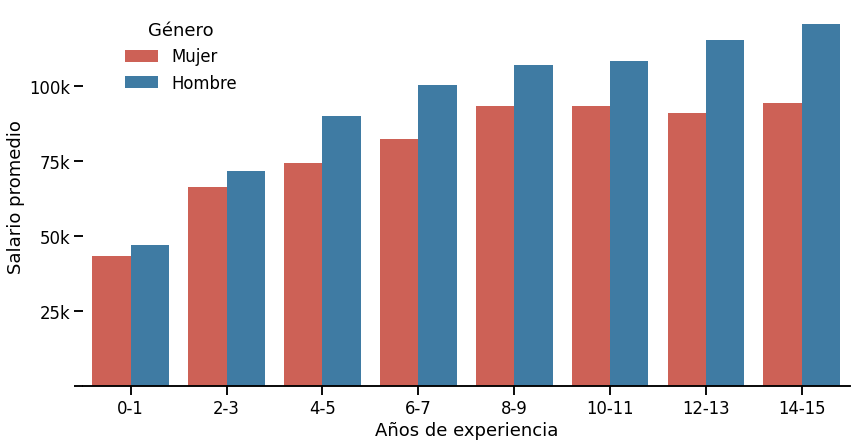

In [ ]:
# Previsualizacion
labelsy = ['', '25k', '50k', '75k', '100k']
labelsx = ['0-1', '2-3', '4-5', '6-7', '8-9', '10-11', '12-13', '14-15']
palette = {'Hombre':'#2980B9', 'Mujer':'#E74C3C'}
plt.rc('legend', frameon=False)
order = value

g = sns.catplot(
    data=less_than_15exp, kind="bar",
    x='profile_years_experience', y='salary_monthly_NETO', hue="profile_gender",
    ci=None, height=6, aspect=2, saturation=0.7, palette=palette, legend_out=False, order = order)

g.despine(left=True)
g.set_axis_labels("Años de experiencia", "Salario promedio")
g.set(yticks=[0, 25000, 50000, 75000, 100000])
g.set_yticklabels(labelsy)
g.set_xticklabels(labelsx)
g.legend.set_title("Género")
g.legend.set_bbox_to_anchor((.22, 1))